# Project Overview:

The project predicts bank customer churn (i.e., whether a customer leaves the bank or not) using machine learning techniques.
The dataset is available on Kaggle or the creator's GitHub account.

**1. Data Preprocessing:**

Imported libraries: Pandas was used for data manipulation.
Initial steps included displaying the dataset's top and bottom rows using head() and tail().
Identified independent variables (features) and the dependent variable (Exited).

**2. Data Exploration:**

Used info() to check data types, non-null values, and memory usage.
Verified that the dataset had no missing values using the isnull() method.
Descriptive statistics were generated using the describe() method.

**3. Feature Engineering:**

Categorical columns (e.g., Geography) were encoded into numerical values using one-hot encoding while avoiding the dummy variable trap.
Columns deemed irrelevant were dropped to streamline the dataset.

**4. Class Imbalance Handling:**

Target variable (Exited) exhibited an imbalanced distribution.
Used the Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset, increasing minority class examples.

**5. Model Development:**

Split the data into training and testing sets, ensuring stratification to preserve class distribution.
Scaled features using StandardScaler to normalize the data for algorithms sensitive to scale.

**6. Classification Algorithms Tested:**
Implemented multiple classifiers, including:
Logistic Regression
Support Vector Classifier (SVC)
K-Nearest Neighbors (KNN)
Decision Tree
Random Forest
Gradient Boosting
Evaluated each model's accuracy, precision, recall, and F1-score.

**7. Best Model Selection:**

Random Forest emerged as the best-performing model with an accuracy of 87%.
Precision, recall, and F1-score significantly improved after addressing class imbalance.

**8. Production Deployment:**

Saved the best model using the joblib library for future predictions.
Developed a Graphical User Interface (GUI) to facilitate user interaction, requiring numerical inputs for categorical variables (e.g., Geography).

**9. Visualization and Insights:**

Visualized model performance using bar plots to compare accuracy scores across classifiers.
Highlighted the importance of addressing class imbalance for reliable predictions in imbalanced datasets.

In [304]:
import pandas as pd

In [305]:
data = pd.read_csv('Churn_Modelling.csv')

### 1. Display top 5 rows

In [306]:
 data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. Display last 5 rows

In [307]:
 data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 3. Shape of dataset (No. of rows & columns)

In [308]:
data.shape # tuple output

(10000, 14)

In [309]:
print("No. of Rows: ", data.shape[0])
print("No. of Rows: ", data.shape[1])

No. of Rows:  10000
No. of Rows:  14


### 4. Info about dataset

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 5. Check Null Values

In [311]:
data.isnull().sum() # no null/missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 6. Overall stats of dataset

In [312]:
data.describe(include='all')  # use include if you want to include categorical columns also

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


 **In age columne 25% values are below 32 .....**

### 7. Dropping irrelevant Features

In [313]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**RowNumber', 'CustomerId', 'Surname these dont provide any explanatory power for ML**

In [314]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [315]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [316]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 8. Encoding Categorical Data

In [317]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**France 0 , Spain 1 , Germany 2 (convert into binary vector) , by making dummy variables** 

In [318]:
data = pd.get_dummies(data,drop_first=True)

**dummy variables trap where these independent variables are highly correlated as 1 variable can be predicted from others ex from S,G --> F can be predicted**

In [319]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [320]:
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)
data['Gender_Male'] = data['Gender_Male'].astype(int)


In [321]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Not Handling Imbalanced Data

In [322]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

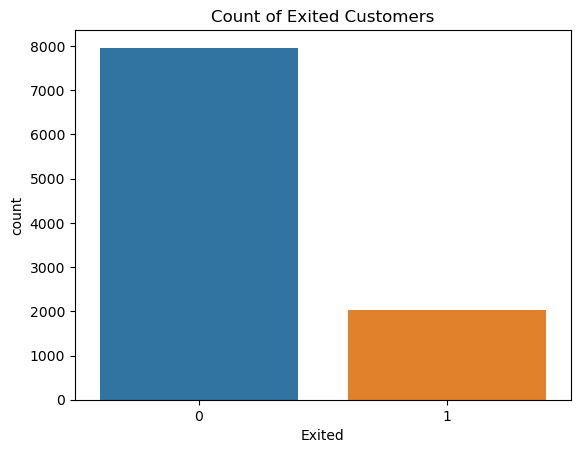

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=data)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.title('Count of Exited Customers')
plt.show()


**As we can see data is imbalanced , 0-not leaving bank 1-leaving bank**

In [324]:
X = data.drop('Exited',axis=1) # independent variables
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [325]:
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### 9. Handling Imbalanced Data with SMOTE(Synthetic Miniority Oversampling Technique)

**Either use oversampling or undersampling**

**Oversampling- oversample miniority class using replacement , Undersampling- Randomly delete rows from the majority class to match with miniority class disadvanatge is we can loose lot of useful data**

**SMOTE generates the virtual training records by Linear Interpolation for Miniority Class we are not creating duplicates but generating data points with slightly diff**

In [326]:
from imblearn.over_sampling import SMOTE

In [327]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [328]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### 10. Splitting Dataset into train and test 

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [331]:
X_train.shape

(12740, 11)

In [332]:
X_test.shape

(3186, 11)

**Train ML model on X_train,y_train , test model on X-test and compare predicted result with y_test**

### 11. Feature Scaling

**Why? Essential for Ml algo which claculate distance between data, if not scaled features with hugh value range starts dominating when calculating distances , K-Nearest , NN,LR,LogisticReg,SVM , Non-Linear(DT,RF,Naive Bayes) dont need FS**

In [333]:
from sklearn.preprocessing import StandardScaler

In [334]:
sc = StandardScaler()

In [335]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [336]:
X_train

array([[-8.79859533e-01, -2.99749821e-01,  6.95955858e-02, ...,
        -5.69494797e-01, -4.61880215e-01, -8.37082741e-01],
       [ 1.09557276e+00,  1.02156430e-01, -1.40753521e+00, ...,
        -5.69494797e-01, -4.61880215e-01,  1.19462504e+00],
       [ 5.87436546e-02, -4.00226383e-01,  6.95955858e-02, ...,
        -5.69494797e-01, -4.61880215e-01, -8.37082741e-01],
       ...,
       [ 2.00625532e-01,  2.02632992e-01,  1.17744369e+00, ...,
        -5.69494797e-01, -4.61880215e-01,  1.19462504e+00],
       [ 6.59013135e-01,  1.67986718e-03,  6.95955858e-02, ...,
         1.75594229e+00, -4.61880215e-01, -8.37082741e-01],
       [ 5.28045248e-01,  1.00644549e+00, -1.40753521e+00, ...,
         1.75594229e+00, -4.61880215e-01,  1.19462504e+00]])

### 12. Logistic Regression

In [337]:
from sklearn.linear_model import LogisticRegression

In [338]:
log = LogisticRegression()

In [339]:
log.fit(X_train,y_train)

LogisticRegression()

In [340]:
y_pred1=log.predict(X_test)

In [341]:
from sklearn.metrics import accuracy_score

In [342]:
accuracy_score(y_test,y_pred1)  # before SMOTE

0.7871939736346516

Accuracy = (TN + TP) / Total Samples

In [343]:
accuracy_score(y_test,y_pred1) #after SMOTE

0.7871939736346516

**As imbalanced data so dangerous to use accuracy to use , so use precision,recall,f1-score**

In [344]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [345]:
 precision_score(y_test,y_pred1) # before SMOTE

0.774294670846395

In [346]:
precision_score(y_test,y_pred1) # after SMOTE

0.774294670846395

In [347]:
recall_score(y_test,y_pred1)  # before SMOTE

0.7952350289761752

In [348]:
recall_score(y_test,y_pred1)  # after SMOTE

0.7952350289761752

In [349]:
f1_score(y_test,y_pred1)   # before SMOTE

0.7846251588310038

In [350]:
f1_score(y_test,y_pred1) # after SMOTE

0.7846251588310038

**As we did not deal with imbalanced dataset till now thats why these values are very les , so handle dataset with SMOTE**

**After smote all values are improved but accuracy dropped a little**

ps = TP/(FP + TF)

rs = TP/(TP + FN)

### 13. SVC

In [351]:
from sklearn import svm

In [352]:
svm = svm.SVC()

In [353]:
svm.fit(X_train,y_train)

SVC()

In [354]:
y_pred2 = svm.predict(X_test)

In [355]:
accuracy_score(y_test,y_pred2)

0.8418079096045198

In [356]:
precision_score(y_test,y_pred2)

0.833015873015873

In [357]:
recall_score(y_test,y_pred2)

0.8448164842240824

In [358]:
f1_score(y_test,y_pred2)

0.8388746803069053

### 14. KNeighbors Classifier

In [359]:
from sklearn.neighbors import KNeighborsClassifier

In [360]:
knn = KNeighborsClassifier()

In [361]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [362]:
y_pred3 = knn.predict(X_test)

In [363]:
accuracy_score(y_test,y_pred3)

0.8254865034526051

In [364]:
precision_score(y_test,y_pred3)

0.808286951144094

In [365]:
recall_score(y_test,y_pred3)

0.8415969092079846

In [366]:
f1_score(y_test,y_pred3)

0.8246056782334384

### 15. DT Classifier

In [367]:
from sklearn.tree import DecisionTreeClassifier

In [368]:
dt = DecisionTreeClassifier()

In [369]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [370]:
y_pred4 = dt.predict(X_test)

In [371]:
accuracy_score(y_test,y_pred4)

0.7981795354676711

In [372]:
precision_score(y_test,y_pred4)

0.781559405940594

In [373]:
recall_score(y_test,y_pred4)

0.8132646490663232

In [374]:
f1_score(y_test,y_pred4)

0.7970968759861154

### 16. RF Classifier

In [375]:
from sklearn.ensemble import RandomForestClassifier

In [376]:
rf = RandomForestClassifier()

In [377]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [378]:
y_pred5 = rf.predict(X_test) # unseen samples in X_test

In [379]:
accuracy_score(y_test,y_pred5)

0.8634651600753296

In [380]:
precision_score(y_test,y_pred5)

0.8569604086845466

In [381]:
recall_score(y_test,y_pred5)

0.8641339343206696

In [382]:
f1_score(y_test,y_pred5)

0.8605322218659828

### 17. Gradient Boosting Classifier

In [383]:
from sklearn.ensemble import GradientBoostingClassifier

In [384]:
gbc = GradientBoostingClassifier()

In [385]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [386]:
y_pred6 = gbc.predict(X_test) # unseen samples in X_test

In [387]:
accuracy_score(y_test,y_pred6)

0.8483992467043314

In [388]:
precision_score(y_test,y_pred6)

0.8465025906735751

In [389]:
recall_score(y_test,y_pred6)

0.8415969092079846

In [390]:
f1_score(y_test,y_pred6)

0.8440426218921536

### 18. Visualising

In [391]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],  # Model abbreviations
    'ACC': [
        accuracy_score(y_test, y_pred1),  # Accuracy for Logistic Regression
        accuracy_score(y_test, y_pred2),  # Accuracy for Support Vector Classifier
        accuracy_score(y_test, y_pred3),  # Accuracy for K-Nearest Neighbors
        accuracy_score(y_test, y_pred4),  # Accuracy for Decision Tree
        accuracy_score(y_test, y_pred5),  # Accuracy for Random Forest
        accuracy_score(y_test, y_pred6)   # Accuracy for Gradient Boosting Classifier
    ]
})

In [392]:
final_data

,Models,ACC
0,LR,0.787194
1,SVC,0.841808
2,KNN,0.825487
3,DT,0.798180
4,RF,0.863465
5,GBC,0.848399


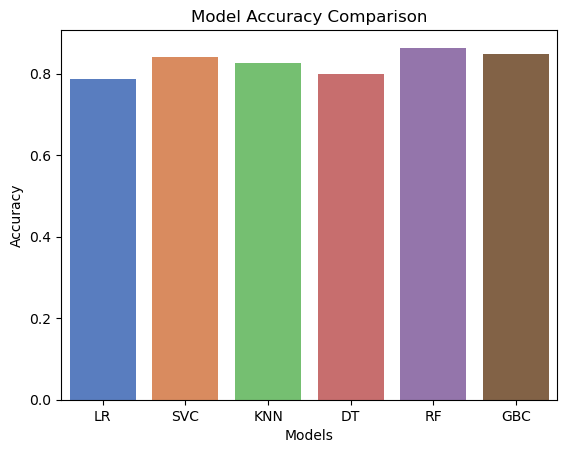

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct usage of sns.barplot()
sns.barplot(x='Models', y='ACC', data=final_data, palette='muted')

# Adding title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


### RF performs best

In [394]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],  # Model abbreviations
    'PRE': [
        precision_score(y_test, y_pred1),  # Precision Score for Logistic Regression
        precision_score(y_test, y_pred2),  # Precision Score for Support Vector Classifier
        precision_score(y_test, y_pred3),  # Precision Score for K-Nearest Neighbors
        precision_score(y_test, y_pred4),  # Precision Score for Decision Tree
        precision_score(y_test, y_pred5),  # Precision Score for Random Forest
        precision_score(y_test, y_pred6)   # Precision Score for Gradient Boosting Classifier
    ]
})

In [395]:
final_data

,Models,PRE
0,LR,0.774295
1,SVC,0.833016
2,KNN,0.808287
3,DT,0.781559
4,RF,0.856960
5,GBC,0.846503


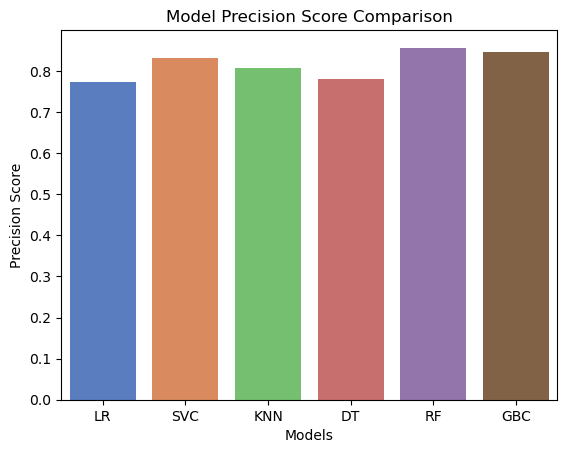

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct usage of sns.barplot()
sns.barplot(x='Models', y='PRE', data=final_data, palette='muted')

# Adding title and labels
plt.title('Model Precision Score Comparison')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.show()

### 19. Save The Model

In [397]:
X_res = sc.fit_transform(X_res)

In [398]:
rf.fit (X_res,y_res) # Feature Scaling on X_res( independent var after smote),y_res(dependent var after smote) whole dataset

RandomForestClassifier()

In [399]:
import joblib

In [400]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [401]:
model = joblib.load('churn_predict_model')

In [402]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [403]:
model.predict([[619, 42, 2, 0.0, 0, 0,0, 101348.88, 0, 0, 0]])

array([1], dtype=int64)

**0 is for Exit/Leave Bank and 1 for Will Stay**

### GUI

In [404]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

# # Load the trained model
# model = joblib.load('model_filename.pkl')  # Replace 'model_filename.pkl' with your model file

# Initialize Tkinter
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")
master.geometry("500x600")  # Adjust window size

# Add a header label with styling
Label(master, text="Customers Churn Prediction Using ML", bg="black", fg="white",
      font=("Helvetica", 16)).grid(row=0, column=0, columnspan=2, pady=10)

# Define labels and input fields for each feature
fields = [
    "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
    "HasCrCard", "IsActiveMember", "EstimatedSalary", "Geography (1=Germany, 2=Spain, 3=France)", "Gender (0=Female, 1=Male)"
]
entries = {}

for i, field in enumerate(fields, start=1):
    Label(master, text=f"{field}:").grid(row=i, column=0, padx=10, pady=5, sticky=E)
    entry = Entry(master)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries[field] = entry

# Define the function to handle predictions
def show_entry_fields():
    try:
        # Retrieve inputs in the correct order
        p1 = int(entries["CreditScore"].get())
        p2 = int(entries["Age"].get())
        p3 = int(entries["Tenure"].get())
        p4 = float(entries["Balance"].get())
        p5 = int(entries["NumOfProducts"].get())
        p6 = int(entries["HasCrCard"].get())
        p7 = int(entries["IsActiveMember"].get())
        p8 = float(entries["EstimatedSalary"].get())
        p9 = int(entries["Geography (1=Germany, 2=Spain, 3=France)"].get())
        p10 = int(entries["Gender (0=Female, 1=Male)"].get())

        # One-hot encoding for Geography
        if p9 == 1:  # Germany
            Geography_Germany = 1
            Geography_Spain = 0
        elif p9 == 2:  # Spain
            Geography_Germany = 0
            Geography_Spain = 1
        elif p9 == 3:  # France
            Geography_Germany = 0
            Geography_Spain = 0
        else:
            raise ValueError("Invalid Geography input. Enter 1 for Germany, 2 for Spain, or 3 for France.")

        # Create the input array for prediction
        input_data = [[p1, p2, p3, p4, p5, p6, p7, p8, Geography_Germany, Geography_Spain, p10]]

        # Feature scaling (if your model requires scaled inputs)
        scaler = StandardScaler()
        input_data = scaler.fit_transform(input_data)

        # Predict using the trained model
        result = model.predict(input_data)

        # Display the prediction result
        if result[0] == 0:
            Label(master, text="Prediction: No Exit", fg="green", font=("Helvetica", 12)).grid(row=31, column=0, columnspan=2, pady=10)
        else:
            Label(master, text="Prediction: Exit", fg="red", font=("Helvetica", 12)).grid(row=31, column=0, columnspan=2, pady=10)
    except Exception as ex:
        Label(master, text=f"Error: {ex}", fg="red", font=("Helvetica", 12)).grid(row=31, column=0, columnspan=2, pady=10)

# Add a button for prediction
Button(master, text="Predict", command=show_entry_fields, bg="blue", fg="white", font=("Helvetica", 12)).grid(row=30, column=0, columnspan=2, pady=10)

# Run the Tkinter event loop
mainloop()
